#  1. Prepare the environment

In [44]:
!pip install livelossplot

In [128]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [129]:
gpu_info = !nvidia-smi

In [166]:
import os
import sys
print( f"Python {sys.version}\n" )

import numpy as np
print( f"NumPy {np.__version__}\n" )

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
print( f"Matplotlib {matplotlib.__version__}\n" )

import tensorflow as tf
print( f"TensorFlow {tf.__version__}" )
print( f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}" )

# Count the number of GPUs as detected by tensorflow
gpus = tf.config.list_physical_devices('GPU')
print( f"TensorFlow detected { len(gpus) } GPU(s):" )
for i, gpu in enumerate(gpus):
  print( f".... GPU No. {i}: Name = {gpu.name} , Type = {gpu.device_type}" )

Python 3.10.12 (main, Jun 11 2023, 05:26:28) [GCC 11.4.0]

NumPy 1.23.5

Matplotlib 3.7.1

TensorFlow 2.14.0
tf.keras.backend.image_data_format() = channels_last
TensorFlow detected 1 GPU(s):
.... GPU No. 0: Name = /physical_device:GPU:0 , Type = GPU


In [280]:
#tf.random.set_seed(42)

# EDA

In [105]:
directory = "/content/drive/MyDrive/Deep_learning/raw_data_train/dirt"
files = os.listdir(directory)
# Create an empty dictionary to store the counts
counts = {}

# Loop through each file
for file in files:
    # Get the file extension
    ext = os.path.splitext(file)[1]
    # If the extension is not in the dictionary, add it with a count of 1
    if ext not in counts:
        counts[ext] = 1
    # If the extension is in the dictionary, increment the count by 1
    else:
        counts[ext] += 1

# Print the counts for each extension
for ext, count in counts.items():
    print("Number of files with extension", ext, ":", count)

Number of files with extension .jpg : 192
Number of files with extension .png : 8


In [106]:
# Convert the list to a DataFrame
df = pd.DataFrame(image_data)

'''
# Debugging - Print keys in image_data
for data in image_data:
    print(data.keys())
'''

# Create a dataframe summarizing the number of pictures in each class, each size, and each picture type
class_counts = df['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

size_counts = df.groupby(['Width', 'Height']).size().reset_index(name='Count')

type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']


# Print the dataframes
print("Class Counts:")
print(class_counts)

print("\nSize Counts:")
print(size_counts)

print("\nType Counts:")
print(type_counts)



NameError: ignored

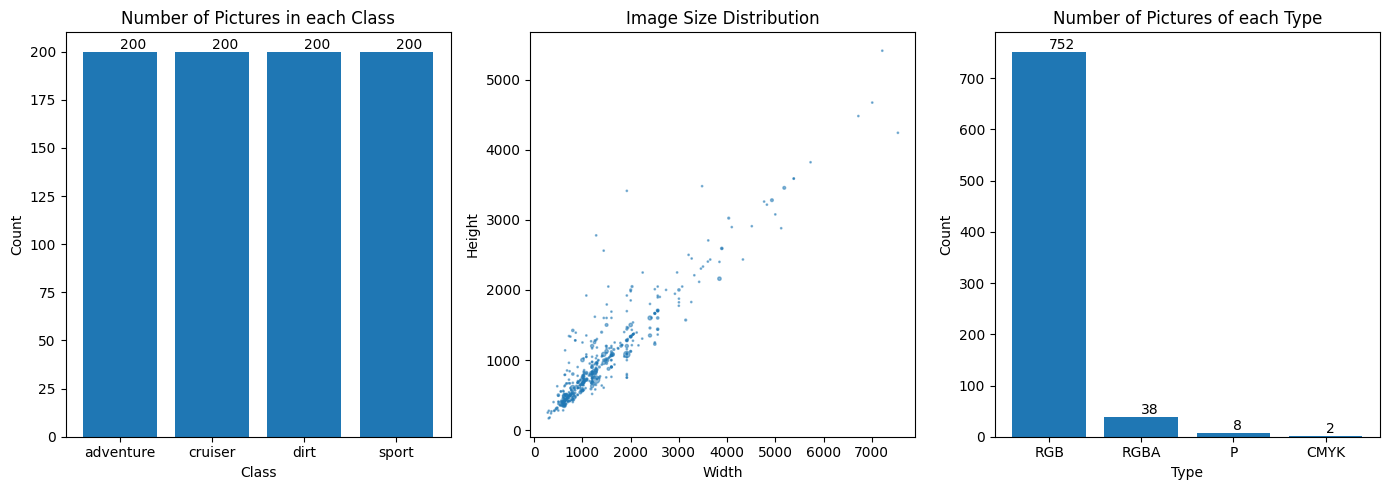

In [ ]:
# Creating a single subplot for all three graphs
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# Plotting the first graph for Class Counts
bars = axs[0].bar(class_counts['Class'], class_counts['Count'])
axs[0].set_title('Number of Pictures in each Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=0)
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar

# Plotting the second graph for Size Counts
axs[1].scatter(size_counts['Width'], size_counts['Height'], s=size_counts['Count'], alpha=0.5)
axs[1].set_title('Image Size Distribution')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Height')

# Plotting the third graph for Type Counts
bars = axs[2].bar(type_counts['Type'], type_counts['Count'])
axs[2].set_title('Number of Pictures of each Type')
axs[2].set_xlabel('Type')
axs[2].set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar

plt.tight_layout()
plt.show()



In [ ]:
# Print the DataFrame
print(df)

                                                 Image      Class  Width  \
0               KTM-1290-Super-Adventure-R-644x430.jpg  adventure    644   
1                                    download (53).jpg  adventure   1065   
2                         africa-twin-2-1635391943.jpg  adventure   1200   
3    DSC08710-Edit-2_ccc331b8-1805-460a-9d2f-fac333...  adventure   1500   
4    000000200596_09d47a34_95b6_486d_b773_4e7126a6a...  adventure   1000   
..                                                 ...        ...    ...   
795  Honda_CBR250_Four_in_the_Honda_Collection_Hall...      sport   1200   
796                                       IMG_0704.jpg      sport   1280   
797                                       IMG_0705.jpg      sport    830   
798                                       IMG_0714.jpg      sport    554   
799                                       IMG_0716.jpg      sport    678   

     Height    Image Size Type  
0       430    (644, 430)  RGB  
1       599   (1065, 

In [ ]:
filtered_df = df[(df['Width'] <= 500) & (df['Height'] <= 500)].reset_index()
filtered_df

,index,Image,Class,Width,Height,Image Size,Type
0,12,download (21).jpg,adventure,280,250,"(280, 250)",RGB
1,14,KTM-390-Adventure-SW-1-464x309.jpg,adventure,464,309,"(464, 309)",RGB
2,43,bmw-g-310-gs.jpg,adventure,302,276,"(302, 276)",RGB
3,52,download (19).jpg,adventure,450,300,"(450, 300)",RGB
4,108,download (16).jpg,adventure,500,500,"(500, 500)",RGB
5,116,download (20).jpg,adventure,357,268,"(357, 268)",RGB
6,118,download (14).jpg,adventure,464,309,"(464, 309)",RGB
7,120,suzuki-v-strom-1000-5f1867c5a249a.jpg,adventure,320,180,"(320, 180)",RGB
8,162,f56fe1d5eade44b087ee48fd9a374b00_678x380.jpg,adventure,499,280,"(499, 280)",RGB
9,168,ea23465d4774e9f56668a049556a9cfc.jpg,adventure,500,375,"(500, 375)",RGB


In [ ]:
filtered_class_counts = filtered_df['Class'].value_counts().reset_index(name='Count')
class_counts.columns = ['Class', 'Count']
class_counts

,Class,Count
0,adventure,200
1,cruiser,200
2,dirt,200
3,sport,200


In [ ]:
filtered_size_counts = filtered_df.groupby(['Width', 'Height']).size().reset_index(name='Count')
filtered_size_counts

,Width,Height,Count
0,280,250,1
1,300,168,1
2,302,276,1
3,320,180,1
4,348,239,1
5,357,268,1
6,400,400,1
7,414,274,1
8,420,280,1
9,450,300,1


In [ ]:
filtered_type_counts = filtered_df['Type'].value_counts().reset_index(name='Count')
type_counts.columns = ['Type', 'Count']
filtered_type_counts

,index,Count
0,RGB,20
1,P,1


In [ ]:
'''
# Creating a single subplot for all three graphs
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# Plotting the first graph for Class Counts
bars = axs[0].bar(class_counts['Class'], class_counts['Count'])
axs[0].set_title('Number of Pictures in each Class')
axs[0].set_xlabel('Class')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=0)
for bar in bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar

# Plotting the second graph for Size Counts
axs[1].scatter(filtered_size_counts['Width'], filtered_size_counts['Height'], s=filtered_size_counts['Count'], alpha=0.5)
axs[1].set_title('Image Size Distribution')
axs[1].set_xlabel('Width')
axs[1].set_ylabel('Height')

# Plotting the third graph for Type Counts
bars = axs[2].bar(filtered_type_counts['Type'], filtered_type_counts['Count'])
axs[2].set_title('Number of Pictures of each Type')
axs[2].set_xlabel('Type')
axs[2].set_ylabel('Count')
for bar in bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar

plt.tight_layout()
plt.show()
'''


"\n# Creating a single subplot for all three graphs\nfig, axs = plt.subplots(1, 3, figsize=(14, 5))\n\n# Plotting the first graph for Class Counts\nbars = axs[0].bar(class_counts['Class'], class_counts['Count'])\naxs[0].set_title('Number of Pictures in each Class')\naxs[0].set_xlabel('Class')\naxs[0].set_ylabel('Count')\naxs[0].tick_params(axis='x', rotation=0)\nfor bar in bars:\n    yval = bar.get_height()\n    axs[0].text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom')  # Add data label on each bar\n\n# Plotting the second graph for Size Counts\naxs[1].scatter(filtered_size_counts['Width'], filtered_size_counts['Height'], s=filtered_size_counts['Count'], alpha=0.5)\naxs[1].set_title('Image Size Distribution')\naxs[1].set_xlabel('Width')\naxs[1].set_ylabel('Height')\n\n# Plotting the third graph for Type Counts\nbars = axs[2].bar(filtered_type_counts['Type'], filtered_type_counts['Count'])\naxs[2].set_title('Number of Pictures of each Type')\naxs[2].set_xlabel('Type')

# Pre-Processing data

In [167]:
2#model_input_h = input('image size :',)
train_batch_size = input('batch size :', )
model_input_w = 224
model_input_h = 224

if train_batch_size == '':
    train_batch_size = 32
else:
    train_batch_size = int(train_batch_size)

print(f'image size :{model_input_w}x{model_input_h}')
print('batch size :', train_batch_size)

batch size :
image size :224x224
batch size : 32


# Read data

In [168]:
def read_infer_label(path, subset=None, size= (300,300), batch_size= 2, shuffle= False, validation_split=0.2):
    # directory = './resize/'
    # directory = './raw_data/'
    tf_raw_data = tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',
        label_mode= 'int',#'categorical',
        class_names=None,
        color_mode='rgb',
        batch_size=batch_size,
        image_size=size,
        shuffle=shuffle,
        seed=42,
        validation_split=validation_split,
        subset=subset,
        interpolation='bilinear',
        follow_links=False,
        crop_to_aspect_ratio=False
    )
    return tf_raw_data

In [169]:
raw_train = read_infer_label("/content/drive/MyDrive/Deep_learning/raw_data_train",'training', size= (model_input_w, model_input_h), batch_size= train_batch_size,shuffle= True)
raw_test = read_infer_label("/content/drive/MyDrive/Deep_learning/raw_data_train",'validation', size= (model_input_w, model_input_h), batch_size= train_batch_size,shuffle= True)

Found 800 files belonging to 4 classes.
Using 640 files for training.
Found 800 files belonging to 4 classes.
Using 160 files for validation.


In [170]:
data_directory = "/content/drive/MyDrive/Deep_learning/raw_data_train"

# Initialize an empty dictionary to store the counts for each class
class_counts = {}
class_names = []
# Iterate over the subdirectories in the main data directory
for class_name in os.listdir(data_directory):
    class_path = os.path.join(data_directory, class_name)
    if os.path.isdir(class_path):
        class_count = len(os.listdir(class_path))
        class_counts[class_name] = class_count

# Display the counts for each class
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Count: {count}")
    class_names.append(class_name)
print(class_names)

Class: adventure, Count: 200
Class: cruiser, Count: 200
Class: dirt, Count: 200
Class: sport, Count: 200
['adventure', 'cruiser', 'dirt', 'sport']


## Data Augmentation

In [171]:
dataaug = tf.keras.models.Sequential( [
                                          tf.keras.Input(shape=(model_input_w, model_input_h,3)),
                                          tf.keras.layers.RandomFlip(mode='horizontal', name='rand_flip'),
                                          #tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='reflect', name='rand_trans'),
                                          tf.keras.layers.RandomRotation(factor=0.05, fill_mode='wrap', name='rand_rot'),
                                          tf.keras.layers.RandomZoom(height_factor= (-0.3, -0.2), fill_mode= 'constant'),
                                      ],
                                     name='dataaug' )

dataaug.summary()

Model: "dataaug"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rand_flip (RandomFlip)      (None, 224, 224, 3)       0         
                                                                 
 rand_rot (RandomRotation)   (None, 224, 224, 3)       0         
                                                                 
 random_zoom_4 (RandomZoom)  (None, 224, 224, 3)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [172]:
def apply_pipeline(image, label):
    return dataaug(image), label

# Apply the sequential pipeline to the dataset
augmented_data = raw_train.map(apply_pipeline)

# Iterate over the dataset and display the augmented images

plt.figure(figsize=(15,16))
for image, label in augmented_data:
  for i in range (25):
    plt.subplot(5, 5, i + 1).set_title(f"class no. {label[i]}: {class_names[int(label[i])]}" )
    plt.imshow(image[i] / 255)
  plt.show()
  break


Output hidden; open in https://colab.research.google.com to view.

## Concat Raw and Augemented data

In [173]:
full_train = raw_train.concatenate(augmented_data)

## Scaling

In [174]:
scaling_layers = [
    tf.keras.Input(shape= (model_input_w, model_input_h,3)),
    tf.keras.layers.Rescaling(1./255)

]

data_scaling = tf.keras.models.Sequential(
    scaling_layers,
    name= 'data_scaling'
)

data_scaling.summary()


Model: "data_scaling"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
scaling_bool = True

In [176]:
if scaling_bool == True:
    # Define a function to apply the sequential pipeline to the data
    def apply_scaling(image, label):
        return data_scaling(image), label

    # Apply the sequential pipeline to the dataset
    full_train_prep = full_train.map(apply_scaling)
else:
    full_train_prep = full_train



## Data Details

In [177]:
batch = full_train_prep.as_numpy_iterator().next()
print('total data :', len(batch[0]) * len(full_train_prep))
print('N batch :', len(batch))
print('data shape :',batch[0][0].shape)
print('label example : ',batch[1][0])

total data : 1280
N batch : 2
data shape : (224, 224, 3)
label example :  0


#VGG-**16** Model

# Prepare for transfer learning and finetuning


In [178]:
from livelossplot import PlotLossesKeras
from livelossplot.outputs import MatplotlibPlot

In [180]:
from tensorflow.keras.optimizers import Adam

In [181]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

# Defining Callbacks

checkpoint_filepath = "/content/drive/MyDrive/Colab Notebooks/vgg16_callback/save_model/best2_vgg_model_epoch{epoch:02d}_valloss{val_loss:.3f}_valacc{val_acc:.3f}.h5"
early_stop_patience = 15
reduce_lr_patience = 15
earlystopping = EarlyStopping(monitor = 'val_acc',
                              mode = 'max' ,
                              patience = early_stop_patience,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath = checkpoint_filepath,
                                monitor = 'val_loss',
                                mode='min',
                                save_best_only=True,
                                save_weights_only=False,
                                verbose = 1,
                                option = tf.saved_model.SaveOptions
                                )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=reduce_lr_patience, min_lr=0.00005,verbose=1)
liveplot = PlotLossesKeras(outputs=[MatplotlibPlot(cell_size=(6,2))])

callback_list = [earlystopping, checkpoint,liveplot]

In [182]:
vgg_extractor = tf.keras.applications.vgg16.VGG16(weights = "imagenet", include_top=False, input_shape = (model_input_w, model_input_h, 3))

vgg_extractor.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Tuneing model


In [183]:
# Iterate over all layers in the model
for i,layer in enumerate(vgg_extractor.layers):
    print( f"Layer {i}: name = {layer.name} , trainable = {layer.trainable}" )

Layer 0: name = input_18 , trainable = True
Layer 1: name = block1_conv1 , trainable = True
Layer 2: name = block1_conv2 , trainable = True
Layer 3: name = block1_pool , trainable = True
Layer 4: name = block2_conv1 , trainable = True
Layer 5: name = block2_conv2 , trainable = True
Layer 6: name = block2_pool , trainable = True
Layer 7: name = block3_conv1 , trainable = True
Layer 8: name = block3_conv2 , trainable = True
Layer 9: name = block3_conv3 , trainable = True
Layer 10: name = block3_pool , trainable = True
Layer 11: name = block4_conv1 , trainable = True
Layer 12: name = block4_conv2 , trainable = True
Layer 13: name = block4_conv3 , trainable = True
Layer 14: name = block4_pool , trainable = True
Layer 15: name = block5_conv1 , trainable = True
Layer 16: name = block5_conv2 , trainable = True
Layer 17: name = block5_conv3 , trainable = True
Layer 18: name = block5_pool , trainable = True


### Freeze layers

In [184]:
# Recursively freeze all layers in the model
vgg_extractor.trainable = False

for i,layer in enumerate(vgg_extractor.layers):
    print( f"Layer {i}: name = {layer.name} , trainable = {layer.trainable}" )

Layer 0: name = input_18 , trainable = False
Layer 1: name = block1_conv1 , trainable = False
Layer 2: name = block1_conv2 , trainable = False
Layer 3: name = block1_pool , trainable = False
Layer 4: name = block2_conv1 , trainable = False
Layer 5: name = block2_conv2 , trainable = False
Layer 6: name = block2_pool , trainable = False
Layer 7: name = block3_conv1 , trainable = False
Layer 8: name = block3_conv2 , trainable = False
Layer 9: name = block3_conv3 , trainable = False
Layer 10: name = block3_pool , trainable = False
Layer 11: name = block4_conv1 , trainable = False
Layer 12: name = block4_conv2 , trainable = False
Layer 13: name = block4_conv3 , trainable = False
Layer 14: name = block4_pool , trainable = False
Layer 15: name = block5_conv1 , trainable = False
Layer 16: name = block5_conv2 , trainable = False
Layer 17: name = block5_conv3 , trainable = False
Layer 18: name = block5_pool , trainable = False


In [185]:
b = vgg_extractor.get_layer('block5_conv3')
#c = vgg_extractor.get_layer('block5_conv2')
#d = vgg_extractor.get_layer('block5_conv1')
# e = x_extractor.get_layer('block4_conv3')
#print(f'Layer {b}: Name = {b.name}, Trainable = {b.trainable}')
#print(f'Layer {c}: Name = {c.name}, Trainable = {c.trainable}')

b.trainable=True
#c.trainable=True
#d.trainable=True

print(f'Layer {b}: Name = {b.name}, Trainable = {b.trainable}')
#print(f'Layer {c}: Name = {c.name}, Trainable = {c.trainable}')
#print(f'Layer {c}: Name = {c.name}, Trainable = {d.trainable}')

Layer <keras.src.layers.convolutional.conv2d.Conv2D object at 0x7acd1fe20af0>: Name = block5_conv3, Trainable = True


In [186]:
for i,layer in enumerate(vgg_extractor.layers):
    print( f"Layer {i}: name = {layer.name} , trainable = {layer.trainable}" )

Layer 0: name = input_18 , trainable = False
Layer 1: name = block1_conv1 , trainable = False
Layer 2: name = block1_conv2 , trainable = False
Layer 3: name = block1_pool , trainable = False
Layer 4: name = block2_conv1 , trainable = False
Layer 5: name = block2_conv2 , trainable = False
Layer 6: name = block2_pool , trainable = False
Layer 7: name = block3_conv1 , trainable = False
Layer 8: name = block3_conv2 , trainable = False
Layer 9: name = block3_conv3 , trainable = False
Layer 10: name = block3_pool , trainable = False
Layer 11: name = block4_conv1 , trainable = False
Layer 12: name = block4_conv2 , trainable = False
Layer 13: name = block4_conv3 , trainable = False
Layer 14: name = block4_pool , trainable = False
Layer 15: name = block5_conv1 , trainable = False
Layer 16: name = block5_conv2 , trainable = False
Layer 17: name = block5_conv3 , trainable = True
Layer 18: name = block5_pool , trainable = False


Add Dense and Batch Norm

In [187]:
x = vgg_extractor.output

# Add our custom layer(s) to the end of the existing model
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
new_outputs = tf.keras.layers.Dense(4, activation="softmax")(x)

# Construct the main model
model = tf.keras.models.Model(inputs=vgg_extractor.inputs, outputs=new_outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

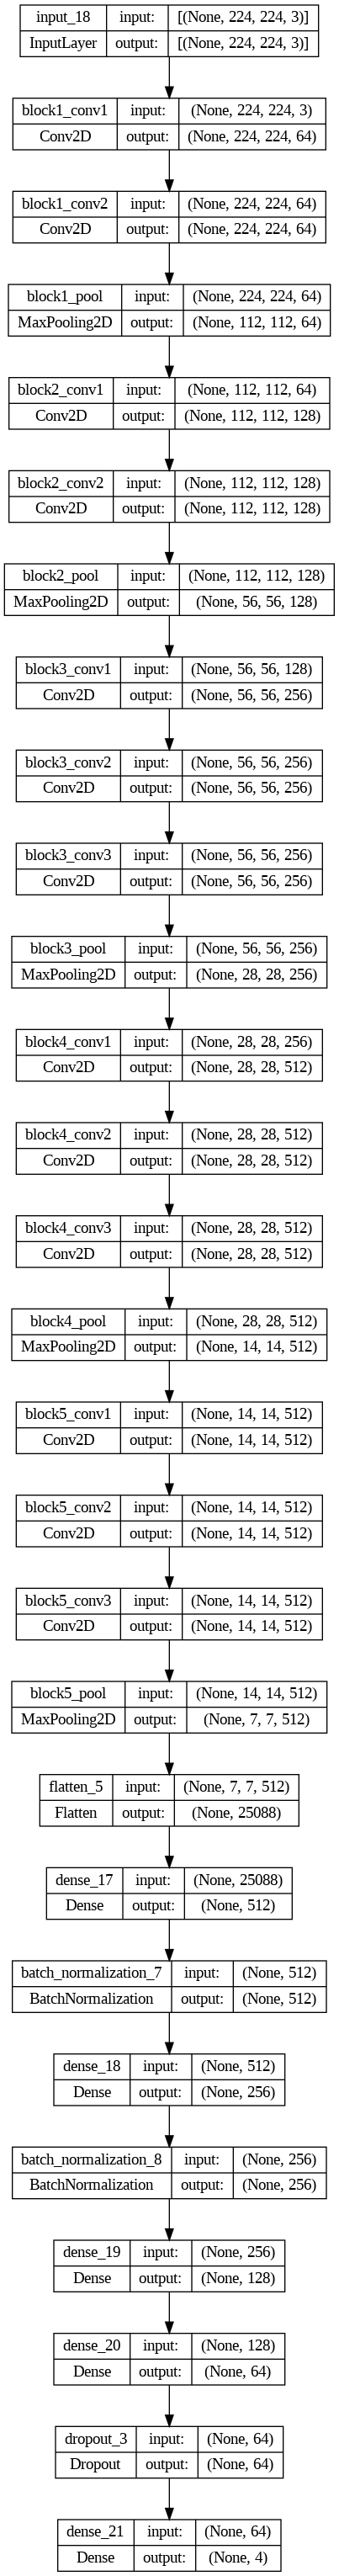

In [188]:
tf.keras.utils.plot_model(model, to_file = 'VGG16_Model.png', show_shapes = True, show_dtype = False, show_layer_names = True, dpi = 96)

In [189]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["acc"])

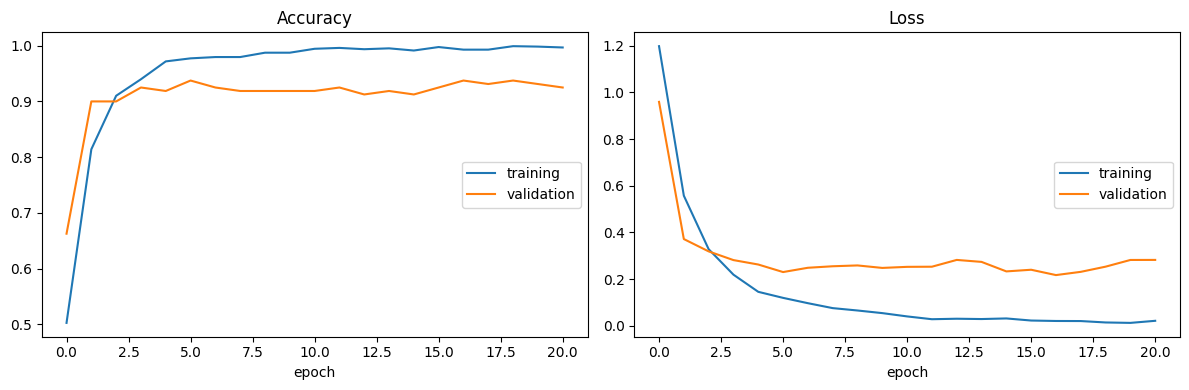

40/40 [==============================] - 35s 793ms/step - loss: 0.0215 - acc: 0.9969 - val_loss: 0.2824 - val_acc: 0.9250
Epoch 21: early stopping


In [190]:
model.fit(full_train, epochs=30, validation_data=raw_test,verbose=1, callbacks=callback_list)

Plot Accuracy and Loss

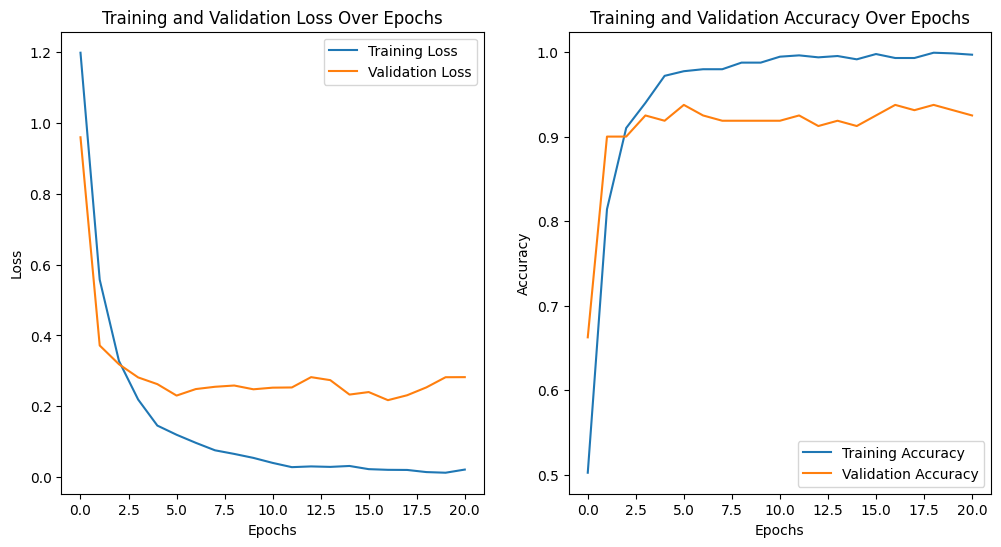

In [191]:
history = model.history.history

# Retrieve the training and validation loss and accuracy
train_loss = history['loss']
val_loss = history['val_loss']
train_acc = history['acc']
val_acc = history['val_acc']

# Create a plot for training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Create a plot for training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Display the plots
plt.show()

# Evaluate

In [192]:
#Load test dataset
test_data = read_infer_label('/content/drive/MyDrive/Deep_learning/raw_data_test', size= (model_input_w, model_input_h), batch_size= 128,shuffle= False,validation_split=None)

Found 200 files belonging to 4 classes.


In [191]:
'''
#Load best model only weight
model.load_weights("/content/drive/MyDrive/Colab Notebooks/vgg16_callback/bestmodel_epoch19_valloss0.25.h5")

'''

'\n#Load best model only weight\nmodel.load_weights("/content/drive/MyDrive/Colab Notebooks/vgg16_callback/bestmodel_epoch19_valloss0.25.h5")\n\n'

In [193]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/vgg16_callback/save_model/best2_vgg_model_epoch17_valloss0.217_valacc0.938.h5")

In [97]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [194]:
loss, acc = model.evaluate(test_data)
print('loss :', loss)
print('acc :', acc)

2/2 [==============================] - 4s 2s/step - loss: 0.2051 - acc: 0.9450
loss : 0.20509842038154602
acc : 0.9449999928474426


#Prediction with Test image dataset

In [195]:
import seaborn as sns
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)


In [196]:
label_lst = test_data.class_names

def plot_cunfusion_metrix(images, labels, predictions=None):
  y_pred = []
  y_test = []
  for i, (image, label) in enumerate(zip(images, labels)):
    y_label = label_lst[int(label)]
    y_test.append(y_label)
    pred = label_lst[int(np.argmax(predictions[i]))]
    y_pred.append(pred)
  cm = confusion_matrix(y_test, y_pred,)
  ax = sns.heatmap(cm, annot = True, xticklabels = label_lst, yticklabels = label_lst, linewidth=.5, )
  ax.set(xlabel='Predict',ylabel='Actual')
  plt.show()

  print(f'\n')
  precision = precision_score(y_test, y_pred,average= 'micro')
  recall = recall_score(y_test, y_pred,average= 'micro')
  f1score = f1_score(y_test, y_pred,average= 'micro')
  print(f"Precision = {precision:.6f}")
  print(f"Recall = {recall:.6f}")
  print(f"F1 Score = {f1score:.6f}")

def plot_sample_images(images, labels, predictions=None):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(zip(images, labels)):
      plt.subplot(5, 5, i + 1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)

      if predictions is not None:
        predicted_label = np.argmax(predictions[i])
        true_label = label
        plt.title(f"Predicted: {label_lst[predicted_label]} : Actual: {label_lst[true_label]}", fontsize = 6)
        plt.imshow(image / 255.0)
    plt.show()

# Convert the test data to numpy arrays

unbatched = np.array([[data[0].numpy(), data[1].numpy()] for data in test_data.unbatch()])
test_images = np.array([data[0] for data in unbatched])
test_labels = np.array([data[1] for data in unbatched])


<ipython-input-196-cede9c988a46>:41: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  unbatched = np.array([[data[0].numpy(), data[1].numpy()] for data in test_data.unbatch()])


In [197]:
predictions = model.predict(test_data)


2/2 [==============================] - 3s 2s/step


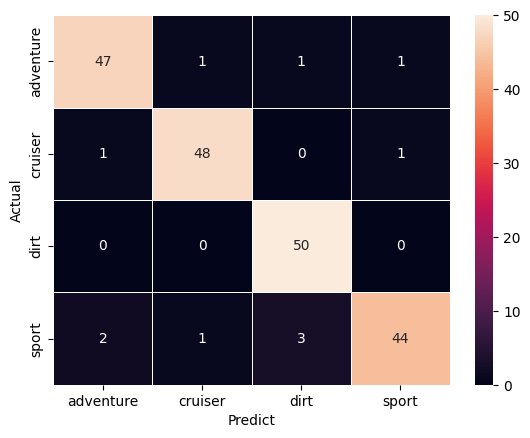



Precision = 0.945000
Recall = 0.945000
F1 Score = 0.945000


In [198]:
# Generate predictions on the test images
#predictions = model.predict(test_data)

# Plot a sample of the test images with their true and predicted labels
plot_cunfusion_metrix(test_images, test_labels, predictions)


In [200]:
len(test_images)
lst =[]

test_images2 = []
test_labels2 = []
predictions2 =[]

import random

lst = random.sample(range(0,len(test_images)),len(test_images))
for i in lst:
  test_images2.append(test_images[i])
  test_labels2.append(test_labels[i])
  predictions2.append(predictions[i])

test_images = test_images2
test_labels = test_labels2
predictions = predictions2


In [201]:
plot_sample_images(test_images[:25], test_labels[:25], predictions[:25])

Output hidden; open in https://colab.research.google.com to view.

## Grad-CAM

In [202]:
import matplotlib.cm as cm
from IPython.display import Image, display

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()


def save_and_display_gradcam2(img, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    # img = tf.keras.utils.load_img(img_path)
    # img = tf.keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = matplotlib.colormaps.get_cmap("jet")

    # Use RGB values oarange(256))[:, :3]
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    # print('eiei')
    display(Image(cam_path))


Predict :adventure   Actual :adventure


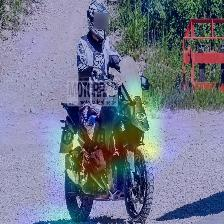

Predict :cruiser   Actual :cruiser


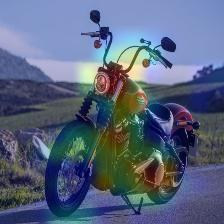

Predict :sport   Actual :sport


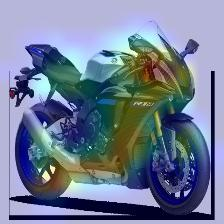

Predict :sport   Actual :sport


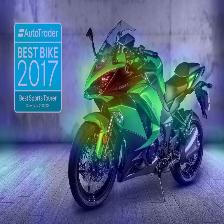

Predict :cruiser   Actual :cruiser


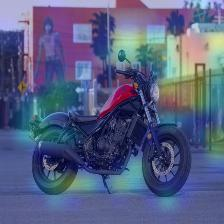

Predict :adventure   Actual :adventure


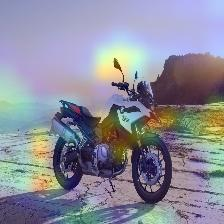

In [203]:
last_conv_layer_name = 'block5_conv3'
for i in range(6):
    img_test = test_images[i]#.shape
    img_label = test_labels[i]
    img_pred = predictions[i]

    print(f'Predict :{label_lst[np.argmax(img_pred)]}   Actual :{label_lst[img_label]}')
    img_test_expand = np.expand_dims(img_test, axis=0)
    heatmap = make_gradcam_heatmap(img_test_expand, model, last_conv_layer_name)
    save_and_display_gradcam2(img_test, heatmap)

In [207]:
import tensorflow.keras.applications
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg16
from tensorflow.keras.applications.xception import preprocess_input as preprocess_xception
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_resnet

model_resnet = tensorflow.keras.applications.ResNet152V2(weights='imagenet')
model_vgg = tensorflow.keras.applications.VGG16(weights='imagenet')
model_xcept = tensorflow.keras.applications.Xception(weights='imagenet')
model_mobile = tensorflow.keras.applications.MobileNet(weights='imagenet')

img_path = '/content/drive/MyDrive/Deep_learning/raw_data_test/cruiser/2021-Harley-Davidson-Softail-Street-Bob-114-1.jpg'

# img = image.load_img(img_path, target_size=(224, 224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)

img_xcept = image.load_img(img_path, target_size=(299, 299))
x_xcept = image.img_to_array(img_xcept)
x_xcept = np.expand_dims(x_xcept, axis=0)

'x_resnet = tensorflow.keras.applications.resnet_v2.preprocess_input(img_path)
x_vgg = tensorflow.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
x_xcept = tensorflow.keras.applications.xception.preprocess_input(x_xcept)
x_mobile = tensorflow.keras.applications.mobilenet.preprocess_input(img_path)

preds_resnet = model_resnet.predict(x_resnet)
preds_vgg = model_vgg.predict(x_vgg)
preds_xcept = model_xcept.predict(x_xcept)
preds_mobile = model_mpbile.predict(x_dense)
print('\nPredicted Resnet152V2:\n', tensorflow.keras.applications.resnet_v2.decode_predictions(preds_resnet, top=3)[0])
print('\nPredicted VGG16:\n', tensorflow.keras.applications.vgg16.decode_predictions(preds_vgg, top=3)[0])
print('\nPredicted Xception:\n', tensorflow.keras.applications.xception.decode_predictions(preds_xcept, top=3)[0])
print('\nPredicted MobileNet:\n', tensorflow.keras.applications.mobilenet.decode_predictions(preds_dense, top=3)[0])

SyntaxError: ignored